# **Visualising Conv Filters Maximisations**

Firstly, we need to install tf-keras-vis. https://github.com/keisen/tf-keras-vis

In [1]:
!pip install --upgrade tf-keras-vis tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.0 MB/s eta 0:00:000:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.9.1 requires tensorflow~=2.16.1, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "D

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

2024-10-14 04:45:34.323481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 04:45:34.343882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 04:45:34.351848: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1 GPUs


I0000 00:00:1728881139.987550      31 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728881140.135527      31 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728881140.135851      31 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728881140.138132      31 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

### **Load a pretrained VGG16 model.**

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

#### **Firstly, we define a function to modify the model**

Define modifier to replace the model output to target layer's output that has filters you want to visualize.

In [4]:
layer_name = 'block5_conv3' # The target layer that is the last layer of VGG16.

def model_modifier(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

### **Create ActivationMaximization Instance** 

If clone argument is True(default), the model will be cloned, so the model instance will be NOT modified, but it takes a machine resources.

In [5]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier, clone=False)

### **Define Loss function**
You MUST define Loss function that return arbitrary filter values. Here, it returns the value corresponding third filter in block5_conv3 layer. ActivationMaximization will maximize the filter value.

In [6]:
filter_number = 7
def loss(output):
    return output[..., filter_number]

### **Visualize**
ActivationMaximization will maximize the model output value that is computed by the loss function. Here, we try to visualize a convolutional filter.

/tmp/ipykernel_31/3398086847.py:7: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activation = activation_maximization(loss, callbacks=[Print(interval=50)])


Steps: 050	Scores: [[575.3511352539062]],	Regularization: [('TotalVariation2D', [10.24444580078125]), ('Norm', [38.35809326171875])]
Steps: 100	Scores: [[944.1813354492188]],	Regularization: [('TotalVariation2D', [12.103206634521484]), ('Norm', [38.752769470214844])]
Steps: 150	Scores: [[1010.9885864257812]],	Regularization: [('TotalVariation2D', [11.220897674560547]), ('Norm', [39.190452575683594])]
Steps: 200	Scores: [[938.2206420898438]],	Regularization: [('TotalVariation2D', [11.036319732666016]), ('Norm', [39.563880920410156])]


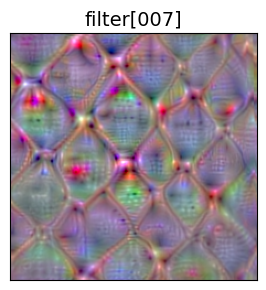

In [8]:
import tensorflow as tf
from tf_keras_vis.utils.callbacks import Print
import matplotlib.pyplot as plt
import numpy as np

# Generate max activation
activation = activation_maximization(loss, callbacks=[Print(interval=50)])
image = tf.cast(activation[0], dtype=tf.uint8).numpy()  # Convert using tf.cast and then to numpy array

# Render
subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
                 
f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
plt.tight_layout()
plt.show()


## **Now let's visualize multiple convolutional filters**

#### **Define Loss function**
When visualizing multiple convolutional filters, you MUST define Loss function that return arbitrary filter values for each layer.

In [9]:
filter_numbers = [63, 132, 320]

# Define loss function that returns multiple filter outputs.
def loss(output):
    return (output[0, ..., 63], output[1, ..., 132], output[2, ..., 320])

#### **Create SeedInput values** 

And then, you MUST prepare seed-input value. In default, when visualizing a conv filter, tf-keras-vis automatically generate seed-input for generating a image. When visualizing multiple conv filters, you MUST manually generate seed-input whose samples-dim is as many as the number of the filters you want to generate.

In [10]:
# Define seed inputs whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)


#### **Visualize** 

Here, we will visualize 3 images while steps option is to be 512 to get clear images.

/tmp/ipykernel_31/3959704461.py:9: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  callbacks=[Print(interval=50)])


Steps: 050	Scores: [[421.8453369140625, 412.0977783203125, 444.40093994140625]],	Regularization: [('TotalVariation2D', [9.516829490661621, 9.457208633422852, 9.55284309387207]), ('Norm', [38.34701919555664, 38.34552001953125, 38.41315841674805])]
Steps: 100	Scores: [[554.189697265625, 445.54248046875, 537.4630737304688]],	Regularization: [('TotalVariation2D', [9.939918518066406, 8.456270217895508, 9.26550006866455]), ('Norm', [38.51565933227539, 38.50514602661133, 38.64149475097656])]
Steps: 150	Scores: [[666.7542114257812, 592.6702270507812, 653.7050170898438]],	Regularization: [('TotalVariation2D', [10.372664451599121, 8.948979377746582, 9.880467414855957]), ('Norm', [38.73830795288086, 38.703216552734375, 38.88636016845703])]
Steps: 200	Scores: [[654.0010375976562, 502.0963134765625, 586.7322387695312]],	Regularization: [('TotalVariation2D', [9.9596586227417, 8.602703094482422, 9.55395793914795]), ('Norm', [38.958091735839844, 38.900787353515625, 39.131675720214844])]


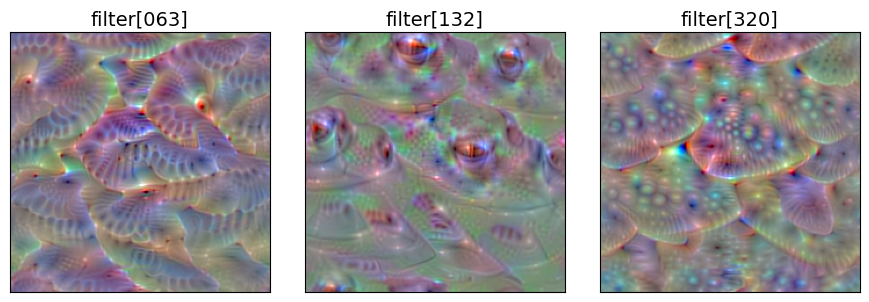

In [12]:
import tensorflow as tf
from tf_keras_vis.utils.callbacks import Print
import matplotlib.pyplot as plt
import numpy as np

# Generate max activation
activations = activation_maximization(loss,
                                      seed_input=seed_input,  # To generate multiple images
                                      callbacks=[Print(interval=50)])

# Convert activations to images using tf.cast and then convert to numpy arrays
images = [tf.cast(activation, dtype=tf.uint8).numpy() for activation in activations]

# Render
subplot_args = { 'nrows': 1, 'ncols': len(images), 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)

for i, filter_number in enumerate(filter_numbers):
    ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
    ax[i].imshow(images[i])
    
plt.tight_layout()
plt.show()


# **Class Maximisation** 

Finding an input that maximizes a specific class of VGGNet.

#### **Load libaries and load your pretrained VGG16 Model**

Load tf.keras.Model¶
This tutorial use VGG16 model in tf.keras but if you want to use other tf.keras.Models, you can do so by modifing section below.


In [13]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

1 GPUs


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

#### **Define a function to modify the model**

Define modifier to replace a softmax function of the last layer to a linear function.

In [14]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

#### **Create ActivationMaximization Instance**

If clone argument is True(default), the model will be cloned, so the model instance will be NOT modified, but it takes a machine resources.

In [15]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model,
                                                 model_modifier,
                                                 clone=False)

#### **Define Loss function**

You MUST define Loss function that return arbitrary category value. Here, we try to visualize a category as defined No.20 (ouzel) of imagenet.



In [16]:
def loss(output):
    return output[:, 20]

### **Visualise**

The Imagenet Classes - https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

/tmp/ipykernel_31/1989531844.py:7: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activation = activation_maximization(loss, callbacks=[Print(interval=50)])


Steps: 050	Scores: [[23.632749557495117]],	Regularization: [('TotalVariation2D', [4.507926940917969]), ('Norm', [38.019287109375])]
Steps: 100	Scores: [[72.69987487792969]],	Regularization: [('TotalVariation2D', [4.601751804351807]), ('Norm', [37.958683013916016])]
Steps: 150	Scores: [[100.54444122314453]],	Regularization: [('TotalVariation2D', [4.600062847137451]), ('Norm', [37.9420280456543])]
Steps: 200	Scores: [[104.71641540527344]],	Regularization: [('TotalVariation2D', [4.951606273651123]), ('Norm', [37.92021560668945])]


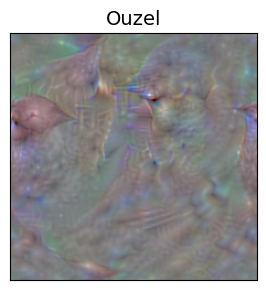

In [18]:
import tensorflow as tf
from tf_keras_vis.utils.callbacks import Print
import matplotlib.pyplot as plt
import numpy as np

# Generate max activation
activation = activation_maximization(loss, callbacks=[Print(interval=50)])

# Convert the activation tensor to uint8 and then to a NumPy array
image = tf.cast(activation[0], dtype=tf.uint8).numpy()

# Render
subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }

f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('Ouzel', fontsize=14)
plt.tight_layout()
plt.show()


### **Visualizing specific output categories** 

Now, let's visualize multiple categories at once!

#### **Define Loss function**

You MUST define loss function that return arbitrary category values. Here, we try to visualize categories as defined No.1 (Goldfish), No.294 (Bear) and No.413 (Assault rifle) of imagenet.


In [ ]:
image_titles = ['Goldfish', 'Bear', 'Assault rifle']

def loss(output):
    return (output[0, 1], output[1, 294], output[2, 413])

#### **Create SeedInput values** 
And then, you MUST prepare seed-input value. In default, when visualizing a conv filter, tf-keras-vis automatically generate seed-input for generating a image. When visualizing multiple conv filters, you MUST manually generate seed-input whose samples-dim is as many as the number of the filters you want to generate.

In [ ]:
# Define seed inputs whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)

#### **Visualize**

Here, we will visualize 3 images while steps option is to be 512 to get clear images.

/tmp/ipykernel_31/4277570757.py:10: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  callbacks=[Print(interval=50)])


Steps: 050	Scores: [[36.12760543823242, 35.86968231201172, 41.30255126953125]],	Regularization: [('TotalVariation2D', [4.4374284744262695, 4.153384685516357, 4.4220871925354]), ('Norm', [38.2483024597168, 38.23999786376953, 38.27143096923828])]
Steps: 100	Scores: [[76.42684173583984, 77.64537811279297, 80.4847183227539]],	Regularization: [('TotalVariation2D', [4.31639289855957, 4.343510150909424, 4.589478492736816]), ('Norm', [38.18284606933594, 38.186275482177734, 38.21507263183594])]
Steps: 150	Scores: [[104.99712371826172, 120.38310241699219, 111.7227554321289]],	Regularization: [('TotalVariation2D', [5.038943767547607, 5.078696250915527, 5.208952903747559]), ('Norm', [38.151329040527344, 38.16072082519531, 38.191253662109375])]
Steps: 200	Scores: [[121.81194305419922, 149.1794891357422, 136.00782775878906]],	Regularization: [('TotalVariation2D', [5.368429660797119, 5.5603742599487305, 5.537638187408447]), ('Norm', [38.146202087402344, 38.16728210449219, 38.187625885009766])]
Steps:

NameError: name 'image_titles' is not defined

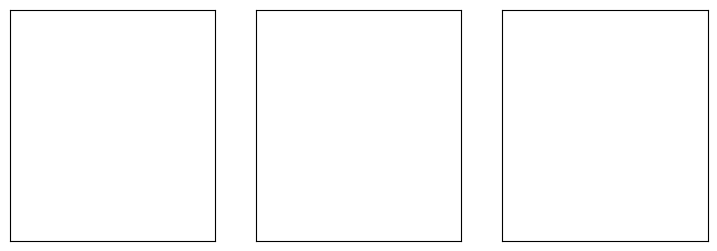

In [19]:
import tensorflow as tf
from tf_keras_vis.utils.callbacks import Print
import matplotlib.pyplot as plt
import numpy as np

# Do 500 iterations and generate an optimizing animation
activations = activation_maximization(loss,
                                      seed_input=seed_input,
                                      steps=512,
                                      callbacks=[Print(interval=50)])

# Convert each activation to uint8 and then to NumPy array
images = [tf.cast(activation, dtype=tf.uint8).numpy() for activation in activations]

# Render
subplot_args = { 'nrows': 1, 'ncols': len(images), 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)

for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])

plt.tight_layout()
plt.show()
